In [6]:
import sys
import os

# Define the path you want to add
path_to_add = "F:\flight prediction mlproject\flight_prediction"

# Add it to the sys.path list
if path_to_add not in sys.path:
    sys.path.append(path_to_add)
 
# Optionally, set the PYTHONPATH environment variable for VS Code
os.environ["PYTHONPATH"] = path_to_add

print("Current Python Path:", sys.path)


Current Python Path: ['c:\\Users\\Lenovo\\anaconda3\\envs\\mlflight\\python38.zip', 'c:\\Users\\Lenovo\\anaconda3\\envs\\mlflight\\DLLs', 'c:\\Users\\Lenovo\\anaconda3\\envs\\mlflight\\lib', 'c:\\Users\\Lenovo\\anaconda3\\envs\\mlflight', '', 'c:\\Users\\Lenovo\\anaconda3\\envs\\mlflight\\lib\\site-packages', 'f:\\end_to_end_flight_price_prediction\\flight_price_prediction\\src', 'c:\\Users\\Lenovo\\anaconda3\\envs\\mlflight\\lib\\site-packages\\win32', 'c:\\Users\\Lenovo\\anaconda3\\envs\\mlflight\\lib\\site-packages\\win32\\lib', 'c:\\Users\\Lenovo\\anaconda3\\envs\\mlflight\\lib\\site-packages\\Pythonwin', 'F:\x0clight prediction mlproject\x0clight_prediction']


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats


In [8]:
data=pd.read_excel(r"F:\end_to_end_flight_price_prediction\FLIGHT_PRICE_PREDICTION\Data_Train.xlsx")

In [9]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [11]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [12]:
data["Price"]

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [13]:
data["Price"].max()


79512

In [14]:
data["Price"].min()

1759

In [15]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.1 MB


In [16]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [17]:
data["Total_Stops"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [18]:
data[data["Total_Stops"].isnull()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [19]:
data.dropna(inplace=True)



In [20]:
data 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Lets Perform Pre-process & extract derived attributes from "Data_of_Journey"

In [21]:

data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [22]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [23]:
def change_into_Datatime(col):
    data[col]=pd.to_datetime(data[col])

for feature in ["Date_of_Journey","Arrival_Time","Dep_Time"]:
    change_into_Datatime(feature) 


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12800\417486647.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col]=pd.to_datetime(data[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12800\417486647.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col]=pd.to_datetime(data[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12800\417486647.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col]=pd.to_datetime(data[col])


In [24]:

from warnings import filterwarnings

filterwarnings("ignore")

In [25]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Lets try to clean Dep_Time & Arr_Time columns by removing the time part and keeping only the date part. We can use the str

In [26]:
import pandas as pd

def extract_date_and_time(data):
    # Convert 'Date_of_Journey', 'Dep_Time', and 'Arrival_Time' to datetime 
    data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], errors='coerce')
    data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], errors='coerce')
    data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'], errors='coerce')
    
    # Extract day, month, and year from 'Date_of_Journey'
    data["Date_of_Journey_day"] = data["Date_of_Journey"].dt.day
    data["Date_of_Journey_month"] = data["Date_of_Journey"].dt.month
    data["Date_of_Journey_year"] = data["Date_of_Journey"].dt.year
    
    # Extract hours and minutes from 'Dep_Time' and 'Arrival_Time'
    data["Dep_Time_hour"] = data["Dep_Time"].dt.hour
    data["Dep_Time_minute"] = data["Dep_Time"].dt.minute
    
    data["Arrival_Time_hour"] = data["Arrival_Time"].dt.hour
    data["Arrival_Time_minute"] = data["Arrival_Time"].dt.minute
    
    # Return the modified dataframe
    return data.head()


# Apply the function
result = extract_date_and_time(data)

# Display the result
print(result)


       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2024-12-01 22:20:00 2024-03-22 01:10:00   2h 50m    non-stop   
1 2024-12-01 05:50:00 2024-12-01 13:15:00   7h 25m     2 stops   
2 2024-12-01 09:25:00 2024-06-10 04:25:00      19h     2 stops   
3 2024-12-01 18:05:00 2024-12-01 23:30:00   5h 25m      1 stop   
4 2024-12-01 16:50:00 2024-12-01 21:35:00   4h 45m      1 stop   

  Additional_Info  Price  Date_of_Journey_day  Date_of_Journey_month  \
0         No info   3897                   24           

In [27]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-01 05:50:00,2024-12-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-01 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [28]:
col=["Dep_Time","Arrival_Time"]

data.drop(col,axis=1,inplace=True)

In [29]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [30]:
def categorize_time(dep_hour):
    if 3 <= dep_hour <= 5:
        return 'Early Morning\n3 am to 5 am'       # 3am to 5 am
    elif 6 <= dep_hour <= 11:
        return 'Morning\n6 am to 11 am'            # 6am to 11 am
    elif 12 <= dep_hour <= 16:                    #12 pm to 16 pm
        return 'Afternoon\n12 pm to 16 pm'
    elif 17 <= dep_hour <= 20:                    # 17pm to 20pm 
        return 'Evening\n17 pm to 20pm'
    elif 21 <= dep_hour <= 23:                    #21 pm to 23 pm
        return 'Night\n21 pm to 23 pm'
    else:  # For hours 0 to 2                     #12 am to  2 am 
        return 'Late Night\n12 am to  2 am '


In [32]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

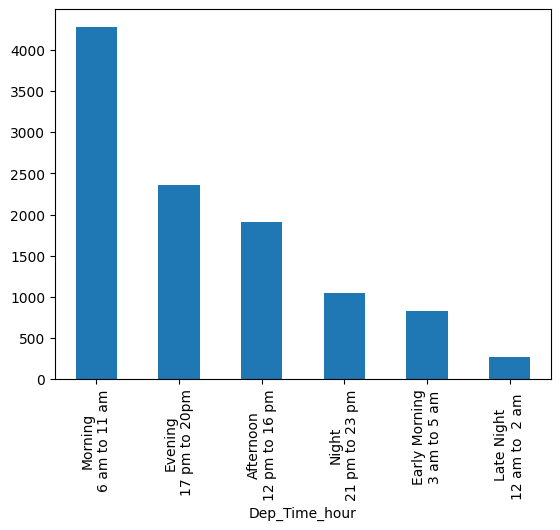

In [33]:
df = data['Dep_Time_hour'].apply(categorize_time).value_counts()
df.plot(kind="bar")
plt.show()



In [34]:
def preprocess_duration(x):
    if "h" not in x:
        x="0h" + " " + x
    elif "m" not in x:
        x = x + " 0m"
    return x

In [35]:
data["Duration"]=data["Duration"].apply(preprocess_duration) 
data["Duration"]

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [36]:
data["Duration"][0]

'2h 50m'

In [37]:
data['Duration'][0]

'2h 50m'

In [38]:
data['Duration'][0].split(" ")[0]

'2h'

In [39]:
data['Duration'][0].split(" ")[0][:-1]

'2'

In [40]:
type(data['Duration'][0].split(" ")[0][:-1])

str

In [41]:
int(data['Duration'][0].split(" ")[0][:-1])

2

In [42]:
type(data['Duration'][0].split(" ")[0][:-1])

str

In [43]:
int(data['Duration'][0].split(" ")[0][:-1])

2

In [44]:
data["Duration_hour"]=data["Duration"].apply(lambda x: int(x.split(" ")[0][:-1]))

In [45]:
data["Duration_hour"]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hour, Length: 10682, dtype: int64

In [46]:
data["Duration_minutes"]=data["Duration"].apply(lambda x: int(x.split(" ")[1][:-1]))

In [47]:

data["Duration_minutes"]

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_minutes, Length: 10682, dtype: int64

In [48]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


In [49]:
data.shape

(10682, 18)

In [50]:
data["Duration"]= data["Duration_hour"]*60 + data["Duration_minutes"]*1

In [51]:
data["Duration"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [52]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


or 

data["duration_total_mins"]=data["duration"].str.replace("h","*60").str.repalce(" ","+").str("m","*1").apply(eval)


data["duration_total_mins"]

In [53]:
col=data.columns
col

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Date_of_Journey_day', 'Date_of_Journey_month', 'Date_of_Journey_year',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hour', 'Duration_minutes'],
      dtype='object')

In [54]:
data.dtypes

Airline                          object
Date_of_Journey          datetime64[ns]
Source                           object
Destination                      object
Route                            object
Duration                          int64
Total_Stops                      object
Additional_Info                  object
Price                             int64
Date_of_Journey_day               int32
Date_of_Journey_month             int32
Date_of_Journey_year              int32
Dep_Time_hour                     int32
Dep_Time_minute                   int32
Arrival_Time_hour                 int32
Arrival_Time_minute               int32
Duration_hour                     int64
Duration_minutes                  int64
dtype: object

In [55]:
for i in col:
    if data[i].dtype in ['int64', 'float64']:  # Numerical columns
        unique_values = data[i].nunique()  # Count unique values
        if unique_values > 20:  # Threshold to decide continuous vs discrete
            print(f"Column: {i} -> Continuous")
        else:
            print(f"Column: {i} -> Discrete")
    else:
        print(f"Column: {i} -> Categorical")



Column: Airline -> Categorical
Column: Date_of_Journey -> Categorical
Column: Source -> Categorical
Column: Destination -> Categorical
Column: Route -> Categorical
Column: Duration -> Continuous
Column: Total_Stops -> Categorical
Column: Additional_Info -> Categorical
Column: Price -> Continuous
Column: Date_of_Journey_day -> Categorical
Column: Date_of_Journey_month -> Categorical
Column: Date_of_Journey_year -> Categorical
Column: Dep_Time_hour -> Categorical
Column: Dep_Time_minute -> Categorical
Column: Arrival_Time_hour -> Categorical
Column: Arrival_Time_minute -> Categorical
Column: Duration_hour -> Continuous
Column: Duration_minutes -> Discrete


In [56]:
data["Duration_hour"].value_counts()

Duration_hour
2     2402
1      621
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     264
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
35       7
36       7
31       6
47       2
42       2
39       2
0        1
41       1
40       1
Name: count, dtype: int64

In [57]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0



1. Airline	Categorical
2. Date_of_Journey	Categorical
3. Source	Categorical
4. Destination	Categorical
5. Route	Categorical
6. Duration	Discrete
7. Total_Stops	Categorical
8. Additional_Info	Categorical
9. Price	Continuous
10. Date_of_Journey_day	Discrete
11. Date_of_Journey_month	Discrete
12. Date_of_Journey_year	Discrete
13. Dep_Time_hour	Discrete
14. Dep_Time_minute	Discrete
15. Arrival_Time_hour	Discrete
16. Arrival_Time_minute	Discrete
17. Duration_hour	Continuous
18. Duration_minutes	Discrete

In [58]:
Categorical=["Airline","Source","Destination","Route","Total_Stops","Additional_Info"]
Discrete=["Date_of_Journey_day","Date_of_Journey_month","Date_of_Journey_year","Dep_Time_hour","Dep_Time_minute","Arrival_Time_hour","Arrival_Time_minute","Duration_minutes"]
Continues=["Price","Duration_hour","Duration","Date_of_Journey"]

<Axes: xlabel='Duration', ylabel='Price'>

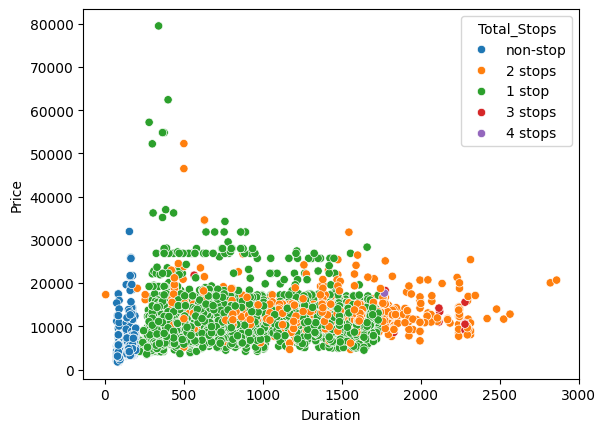

In [59]:
sns.scatterplot(x="Duration",y="Price",hue="Total_Stops",data=data)

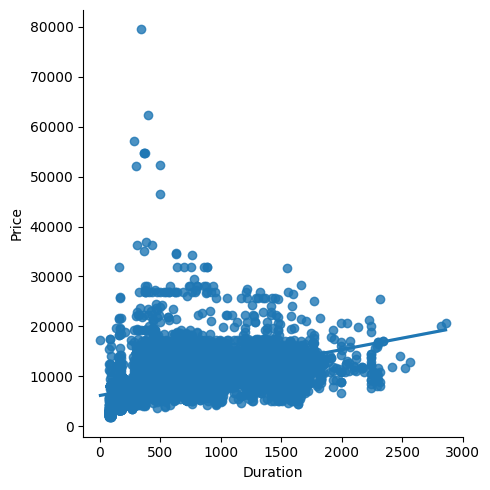

In [60]:
sns.lmplot(x="Duration",y="Price",data=data)

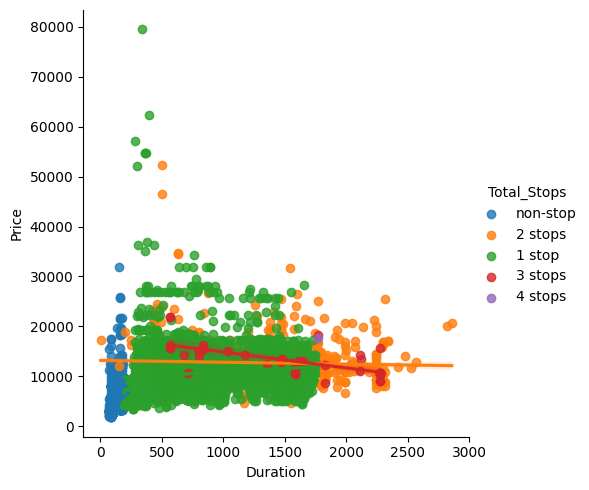

In [61]:
sns.lmplot(x="Duration",y="Price",hue="Total_Stops",data=data)

In [62]:
data["Airline"]

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [63]:
data[data["Airline"]=="Jet Airways"].groupby("Route").size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [64]:
import plotly.express as px


sorted_airlines = data.groupby("Airline")["Price"].median().sort_values(ascending=False).index.tolist()

# Create Boxplot
fig = px.box(
    data, 
    x="Airline", 
    y="Price", 
    color="Airline", 
    title="Boxplot of Airline Prices",
    hover_data=["Price"],
    category_orders={"Airline": sorted_airlines}  # Sort airlines by median price

)


fig.update_layout(
    width=1400,  # Set width of the plot
    height=700,
    font=dict(size=14),  # Adjust font size
    title=dict(font=dict(size=20)),  # Adjust title size
    xaxis=dict(title=dict(font=dict(size=16))),  # X-axis label size
    yaxis=dict(title=dict(font=dict(size=16)))   # Y-axis label size
)


# Show the plot
fig.show()


In [65]:
for i in Categorical:
    print(i)

Airline
Source
Destination
Route
Total_Stops
Additional_Info


In [66]:
numerical=Discrete+Continues

In [67]:
for i in numerical:
    print(i)

Date_of_Journey_day
Date_of_Journey_month
Date_of_Journey_year
Dep_Time_hour
Dep_Time_minute
Arrival_Time_hour
Arrival_Time_minute
Duration_minutes
Price
Duration_hour
Duration
Date_of_Journey


In [68]:
data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [69]:
data.groupby(["Airline"])["Price"].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [70]:
airlines=data.groupby(["Airline"])["Price"].mean().sort_values().index

In [71]:
airlines


Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [72]:
dict_airlines={key:index for index , key in enumerate(airlines,0)}
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [73]:
data["Airline"]=data["Airline"].map(dict_airlines)

In [74]:
data["Airline"]

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [75]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


In [76]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [77]:
data["Destination"]=data["Destination"].replace("New Delhi","Delhi")

In [78]:
(data["Destination"]=="Delhi").sum()


2197

In [79]:
data["Destination"].value_counts()["Delhi"]


2197

In [80]:
(data["Destination"]=="Delhi").value_counts()

Destination
False    8485
True     2197
Name: count, dtype: int64

In [81]:
data["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [82]:
Dest=data.groupby(["Destination"])["Price"].mean().sort_values().index
Dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [83]:
dict_dest={key : index for index , key in enumerate ( Dest )}
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [84]:
data["Destination"]=data["Destination"].map(dict_dest)
data["Destination"]

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [85]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes
0,3,2019-03-24,Banglore,2,BLR → DEL,170,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


In [86]:
#stops=data["Total_Stops"].unique()

In [87]:
#dict_stops={key:index for key,index in enumerate(stops,0)}

In [88]:
#dict_stops
#{0: 'non-stop', 1: '2 stops', 2: '1 stop', 3: '3 stops', 4: '4 stops'}

In [89]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [90]:
stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
stop

{'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [91]:
data["Total_Stops"]=data["Total_Stops"].map(stop)

In [92]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes
0,3,2019-03-24,Banglore,2,BLR → DEL,170,0,No info,3897,24,3,2019,22,20,1,10,2,50
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,2019,5,50,13,15,7,25
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,2019,9,25,4,25,19,0


In [93]:
for i in data["Source"].unique():
    data["source_"+i]=data["Source"].apply(lambda x: 1 if x == i else 0)

In [94]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,170,0,No info,3897,24,...,20,1,10,2,50,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,445,2,No info,7662,1,...,50,13,15,7,25,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,1140,2,No info,13882,9,...,25,4,25,19,0,0,0,1,0,0


In [95]:
data=data.drop(columns=["Additional_Info","Route","Source","Date_of_Journey_year"])

In [96]:
data.shape

(10682, 19)

In [97]:
data.head(3)

,Airline,Date_of_Journey,Destination,Duration,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2019-03-24,2,170,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,2019-05-01,3,445,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,2019-06-09,4,1140,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


In [98]:
data=data.drop(columns=["Date_of_Journey"])
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2,170,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,445,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,1140,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


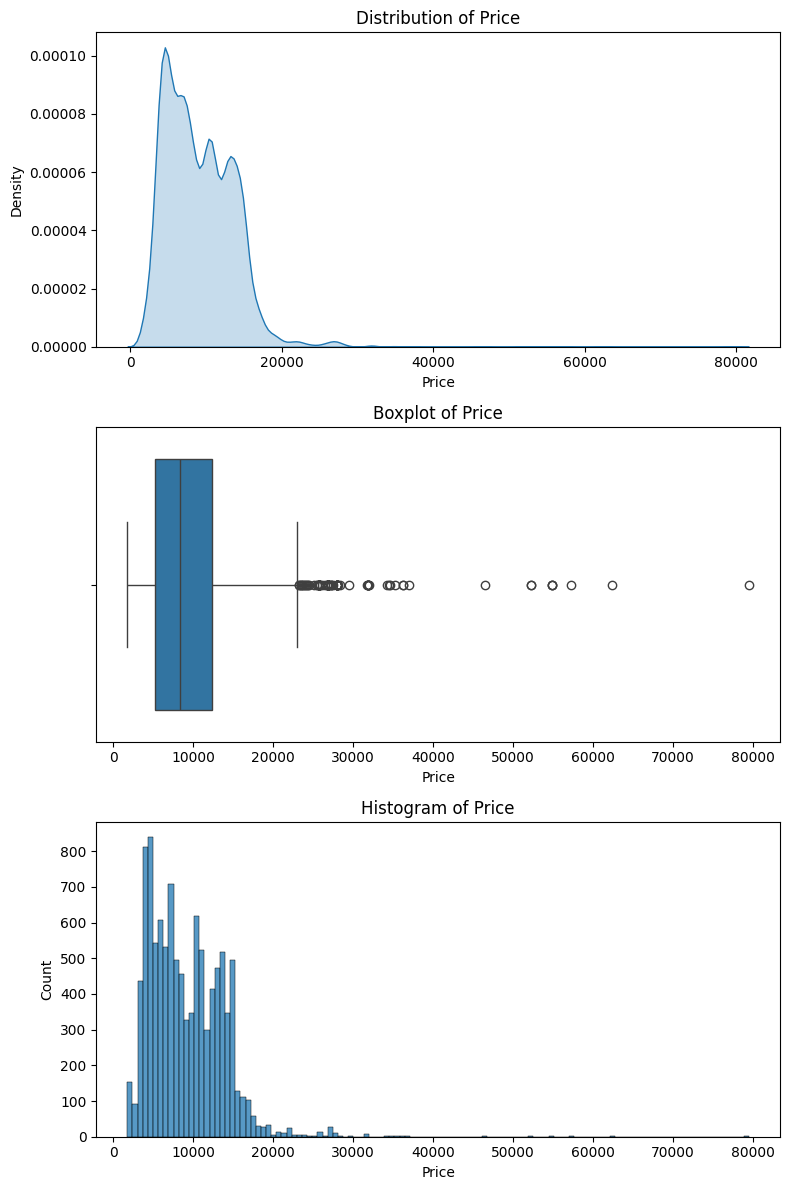

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))
    
    sns.kdeplot(df[col], ax=ax1, fill=True)
    ax1.set_title(f'Distribution of {col}')
    
    
    sns.boxplot(x=df[col], ax=ax2)
    ax2.set_title(f'Boxplot of {col}')
    
    sns.histplot(df[col], ax=ax3, kde=False)
    ax3.set_title(f'Histogram of {col}')
    
    plt.tight_layout() 


plot(data, "Price")


In [100]:
Q3 = data["Price"].quantile(0.75)  # 75th percentile (upper quartile)
Q1 = data["Price"].quantile(0.25)  # 25th percentile (lower quartile)

iqr = Q3 - Q1  # Interquartile Range (IQR)
maximum = Q3 + 1.5 * iqr  # Upper bound for outlier detection
minimum = Q1 - 1.5 * iqr  # Lower bound for outlier detection

print("Maximum:", maximum)
print("Minimum:", minimum)


Maximum: 23017.0
Minimum: -5367.0


In [101]:
# Filter non-outlier values
print([i for i in data["Price"] if i>maximum or i<minimum])


[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [102]:
print(len([i for i in data["Price"] if i>maximum or i<minimum]))

94


if the price  is greater than 35k we repalce it with median 

The median is resistant to outliers since it represents the middle value of sorted data. Replacing extreme values with the median reduces the skew and preserves the integrity of the data.


In [103]:
data["Price"]=np.where(data["Price"]>=35000 ,data["Price"].median(),data["Price"])

In [104]:
data.head()

,Airline,Destination,Duration,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2,170,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,445,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,1140,2,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,325,1,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,285,1,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0


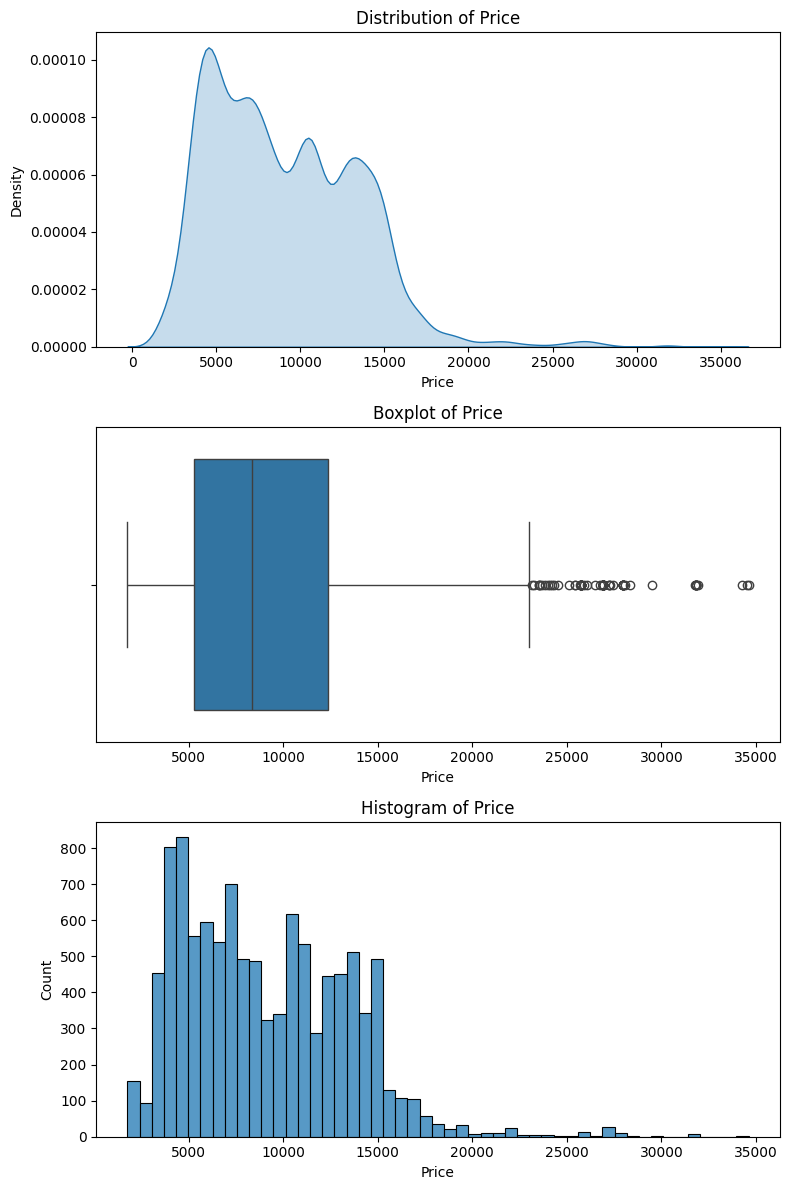

In [105]:
plot(data,"Price")

In [106]:
import pandas as pd

# Save the cleaned data to a CSV file in the desired location
data.to_csv(r"F:\end_to_end_flight_price_prediction\FLIGHT_PRICE_PREDICTION\Cleaned_Data.csv", index=False)

print("Cleaned data saved as 'Cleaned_Data.csv' in your project folder.")

Cleaned data saved as 'Cleaned_Data.csv' in your project folder.


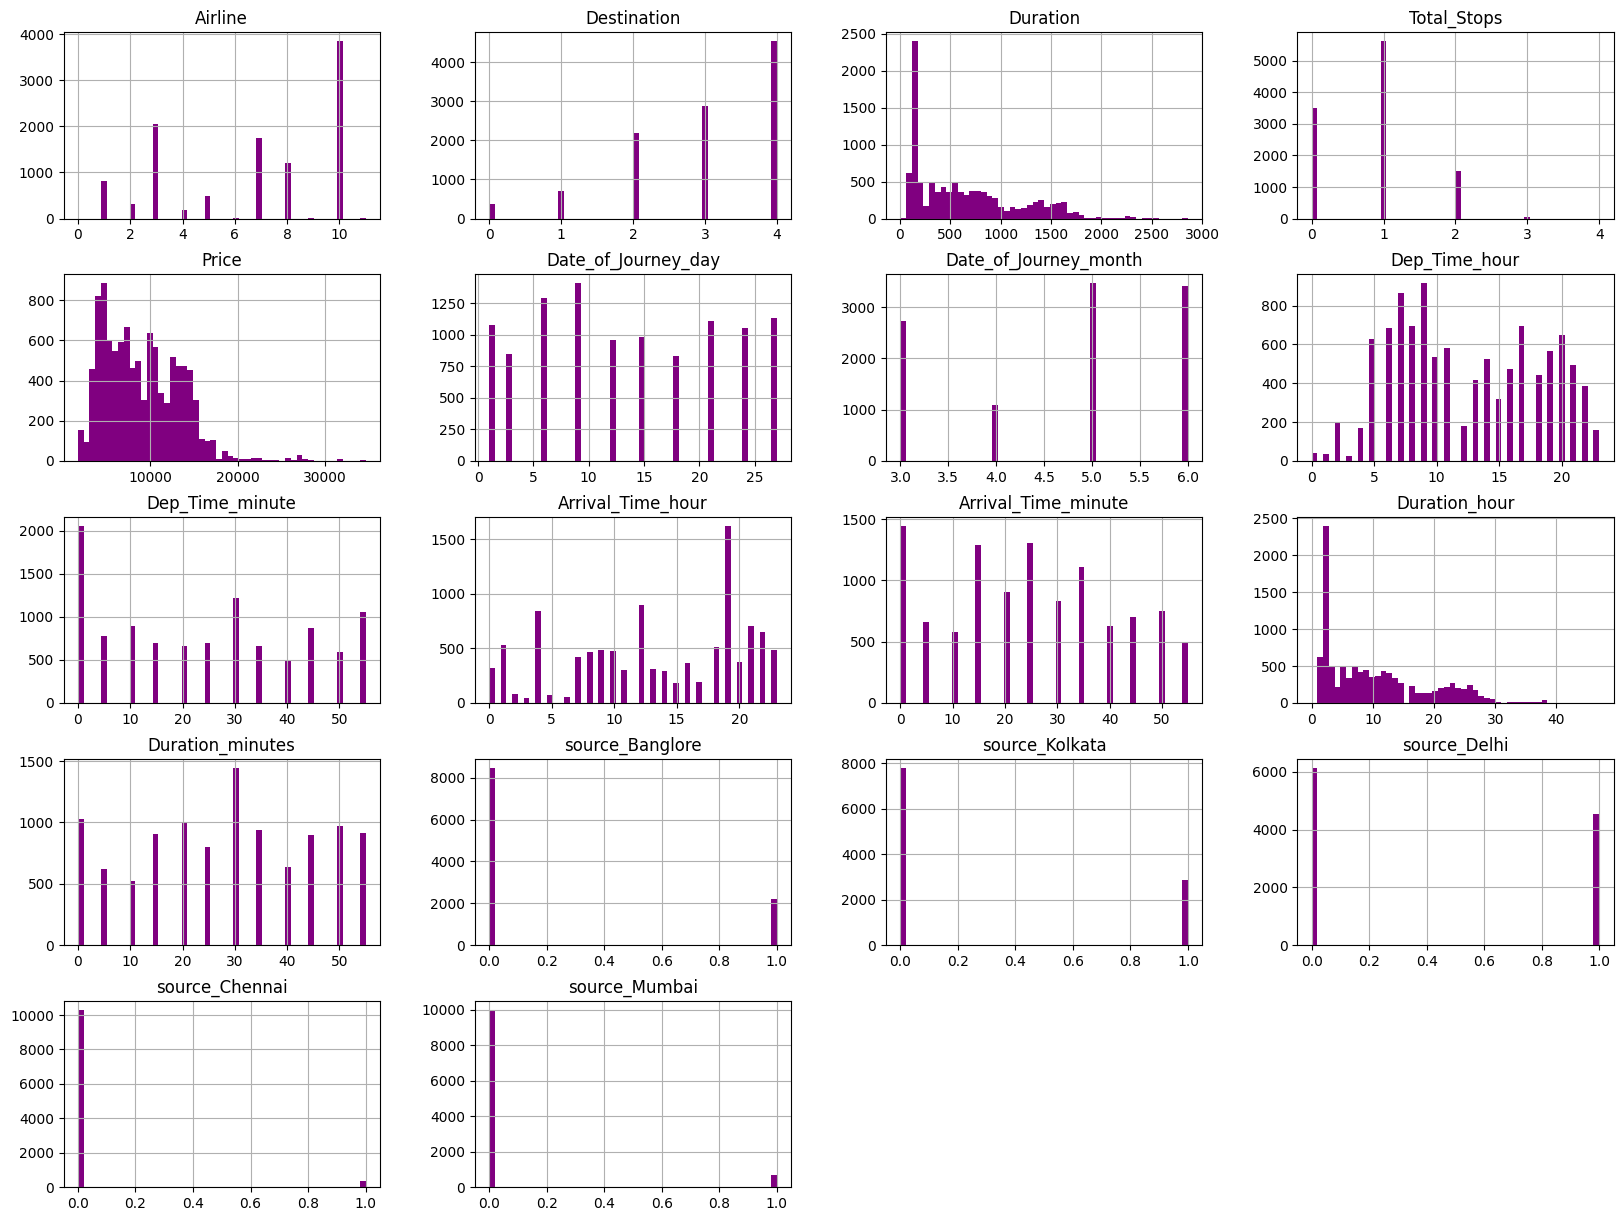

In [107]:
data.hist(bins=50,figsize=(20,15),color="purple")
plt.show()

In [108]:
data.dtypes

Airline                    int64
Destination                int64
Duration                   int64
Total_Stops                int64
Price                    float64
Date_of_Journey_day        int32
Date_of_Journey_month      int32
Dep_Time_hour              int32
Dep_Time_minute            int32
Arrival_Time_hour          int32
Arrival_Time_minute        int32
Duration_hour              int64
Duration_minutes           int64
source_Banglore            int64
source_Kolkata             int64
source_Delhi               int64
source_Chennai             int64
source_Mumbai              int64
dtype: object

In [109]:
x=data.drop(columns="Price",axis=1)

In [110]:
y=data["Price"]

In [111]:
from sklearn.feature_selection import mutual_info_regression
imp=mutual_info_regression(x,y)

In [112]:
imp

array([1.31296791, 1.05951688, 1.77656368, 0.78468955, 0.3697023 ,
       0.6266005 , 0.92113629, 0.75861024, 1.14188116, 0.9067524 ,
       1.12641873, 0.67348693, 0.38889121, 0.45927119, 0.52267192,
       0.12720908, 0.20133747])

In [113]:
imp_df=pd.DataFrame(imp,index=x.columns)

In [114]:
imp_df.columns=["Importance"]

In [115]:
imp_df

,Importance
Airline,1.312968
Destination,1.059517
Duration,1.776564
Total_Stops,0.784690
Date_of_Journey_day,0.369702
Date_of_Journey_month,0.626600
Dep_Time_hour,0.921136
Dep_Time_minute,0.758610
Arrival_Time_hour,1.141881
Arrival_Time_minute,0.906752


In [116]:
imp_df.sort_values(by="Importance",ascending=False)

,Importance
Duration,1.776564
Airline,1.312968
Arrival_Time_hour,1.141881
Duration_hour,1.126419
Destination,1.059517
Dep_Time_hour,0.921136
Arrival_Time_minute,0.906752
Total_Stops,0.784690
Dep_Time_minute,0.758610
Duration_minutes,0.673487


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [118]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [119]:
ml_model=RandomForestRegressor()

In [120]:
ml_model.fit(X_train,Y_train)

RandomForestRegressor()

In [121]:
Y_pred=ml_model.predict(X_test)
Y_pred

array([16946.72      ,  5449.1       ,  8911.45      , ...,
        6717.9       , 12745.98916667, 13096.81197619])

In [122]:
from sklearn import metrics

In [123]:
metrics.r2_score(Y_test,Y_pred)

0.8200948228496763

saving the model

In [124]:
import pickle

In [125]:
file = open(r"F:\end_to_end_flight_price_prediction\FLIGHT_PRICE_PREDICTION\rf_random.pk1", "wb")

In [126]:
pickle.dump(ml_model,file)

In [127]:
model=open(r"F:\end_to_end_flight_price_prediction\FLIGHT_PRICE_PREDICTION\rf_random.pk1","rb")

In [128]:
forest=pickle.load(model)

In [129]:
Y_pred2=forest.predict(X_test)
Y_pred2

array([16946.72      ,  5449.1       ,  8911.45      , ...,
        6717.9       , 12745.98916667, 13096.81197619])

In [130]:
metrics.r2_score(Y_test,Y_pred2)

0.8200948228496763

MAPE (Mean Absolute %Persentage Error)

In [131]:
def mape(y_test,y_pred):
    y_test,y_pred=np.array(y_test),np.array(y_pred)
    return np.mean(np.abs((y_test-y_pred)/y_test)) * 100

In [132]:
mape(Y_test,Y_pred)

13.111390249782154

In [133]:
from sklearn import metrics

In [134]:
print("MAPE : {}".format(metrics.mean_absolute_percentage_error(Y_test,Y_pred)))
#print("RMSE : {}".format(metrics.root_mean_squared_error(Y_test,Y_prediction)))
    

MAPE : 0.13111390249782154


In [135]:
def predict(ml_model):
    model=ml_model.fit(X_train,Y_train)
    print("Training Score  {}".format(model.score(X_train,Y_train)))
    Y_prediction=model.predict(X_test)
    print("Predictions are : {} \n ".format(Y_prediction))
    print("MAE : {}".format(metrics.mean_absolute_error(Y_test,Y_prediction)))
    print("MSE : {}".format(metrics.mean_squared_error(Y_test,Y_prediction)))
    print("RMSE : {}".format(np.sqrt(metrics.mean_squared_error(Y_test,Y_prediction))))
    print("R2 Score : {}".format(metrics.r2_score))
    print("MAPE : {}".format(mape(Y_test,Y_prediction)))
    sns.displot(Y_test-Y_prediction)
    

Training Score  0.9504072659901524
Predictions are : [16824.04        5572.22        8749.23       ...  6736.29
 12915.56666667 13171.29361905] 
 
MAE : 1176.8141863070507
MSE : 3649752.7378481543
RMSE : 1910.4326048955913
R2 Score : <function r2_score at 0x000001980EEA1310>
MAPE : 13.117473480321685


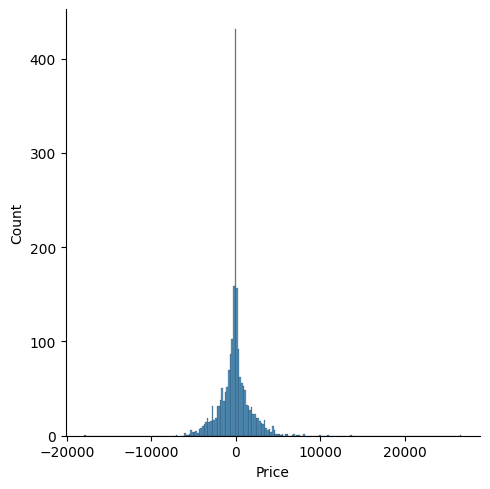

In [136]:
predict(RandomForestRegressor())

In [137]:
from sklearn.tree import DecisionTreeRegressor

Training Score  0.9651196669167478
Predictions are : [16840.  4959.  9397. ...  7452. 13339. 14335.] 
 
MAE : 1343.2310481984089
MSE : 5247750.208478786
RMSE : 2290.7968501110668
R2 Score : <function r2_score at 0x000001980EEA1310>
MAPE : 14.831548845451357


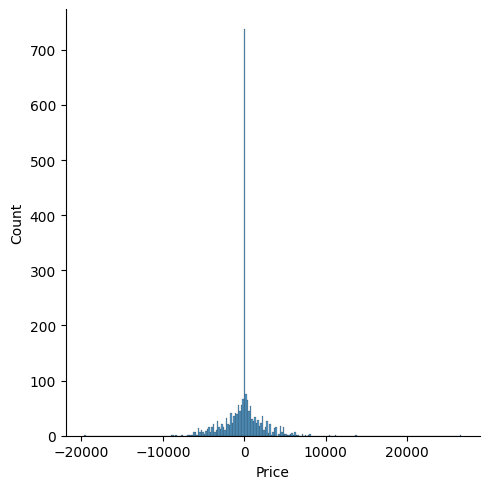

In [138]:
predict(DecisionTreeRegressor())

In [139]:
from sklearn.model_selection import RandomizedSearchCV
reg_rf=RandomForestRegressor()

np.linespace(start =100,stop-1200,num=6)

In [140]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_feature =["auto","sqrt"]
max_depth = [int(x) for x in np.linspace(start = 5,stop = 30 , num=4)]
min_samples_split=[5,10,15,100]

In [141]:
random_grid={
    "n_estimators": n_estimators,
    "max_features": max_feature,
    "max_depth": max_depth,
    "min_samples_split":min_samples_split
}

In [142]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [143]:
random_search = RandomizedSearchCV(
    estimator=reg_rf,
    param_distributions=random_grid,
    n_iter=50,  
    cv=5,     
    verbose=2,
    n_jobs=-1   
)

In [144]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [145]:
random_search.best_params_

{'n_estimators': 540,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 30}

In [146]:
random_search.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=540)

In [147]:
random_search.best_score_

0.8114165312340245

In [148]:
random_search.best_score_


0.8114165312340245